In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("./data/youtalk_datasets.csv", index_col=0)

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
gender,woman,woman,woman,woman,woman,woman,woman,woman,woman,woman,...,woman,woman,woman,woman,woman,woman,woman,woman,man,NaN
self_appointment,False,True,False,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
messages,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
video,True,False,True,True,True,True,True,False,True,True,...,True,True,False,True,True,True,True,True,True,True
audio,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
individual,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
family,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
sync_messages,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
features,"['Детско-родительские, семейные отношения', '...","['Колебания настроения, срывы, агрессия', 'Уст...","['Перепады настроения, срывы', 'Грусть, тоска,...","['Колебания настроения, эмоциональная нестабил...","['Перепады настроения, срывы', 'Состояния на г...","['Перепады настроения, срывы', 'ПТСР, работа с...","['Перепады настроения, апатия, срывы', 'Поиск ...","['Детско-родительские отношения', 'Отношения в...","['Неуверенность в себе', 'Личные границы, мани...","['Отношения с партнером, семейные/детско-родит...",...,"['Кризисы и внутренние конфликты', 'Тревога, с...","['Отношения в паре, конфликты и кризисы', 'Лич...","['Cамооценка и самопринятие', 'Личные границы,...","['Отношения с партнером, конфликты, кризисы', ...","['Сложные решения, серьезные перемены/миграция...","['Отношения с партнером, кризисы и конфликты в...","['Тревога, волнение/панические атаки', 'Чувств...","['Тревога, страхи, панические атаки, навязчиво...","['Кризисы и внутренние конфликты', 'Отношения ...","['Тревога, волнение', 'Сниженное настроение', ..."
friendliness,65,65,67,64,63,56,62,60,53,61,...,65,60,56,64,69,66,65,65,66,60


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 303
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             303 non-null    object 
 1   self_appointment   304 non-null    bool   
 2   messages           277 non-null    float64
 3   video              304 non-null    bool   
 4   audio              275 non-null    float64
 5   individual         304 non-null    bool   
 6   family             276 non-null    float64
 7   sync_messages      276 non-null    float64
 8   features           304 non-null    object 
 9   friendliness       304 non-null    int64  
 10  lgbtq              146 non-null    float64
 11  start_of_practice  304 non-null    int64  
 12  approaches         304 non-null    object 
 13  professions        301 non-null    object 
 14  work_areas         304 non-null    object 
 15  non_working_areas  304 non-null    object 
 16  english            63 non-null 

In [18]:
df.isnull().sum()

gender                 1
self_appointment       0
messages              27
video                  0
audio                 29
individual             0
family                28
sync_messages         28
features               0
friendliness           0
lgbtq                158
start_of_practice      0
approaches             0
professions            3
work_areas             0
non_working_areas      0
english              241
experience           117
age                    2
education_counts       0
training_counts        0
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
messages,277.0,0.191336,0.394065,0.0,0.0,0.0,0.0,1.0
audio,275.0,0.447273,0.498119,0.0,0.0,0.0,1.0,1.0
family,276.0,0.318841,0.466874,0.0,0.0,0.0,1.0,1.0
sync_messages,276.0,0.257246,0.437910,0.0,0.0,0.0,1.0,1.0
friendliness,304.0,60.766447,9.056919,0.0,59.0,62.0,65.0,70.0
lgbtq,146.0,0.801370,0.400342,0.0,1.0,1.0,1.0,1.0
start_of_practice,304.0,2014.894737,4.581002,1993.0,2013.0,2016.0,2018.0,2021.0
english,63.0,0.222222,0.419079,0.0,0.0,0.0,0.0,1.0
experience,187.0,2.727273,4.339795,0.0,0.0,0.0,5.0,21.0
age,302.0,36.672185,7.416097,25.0,31.0,35.0,40.0,66.0


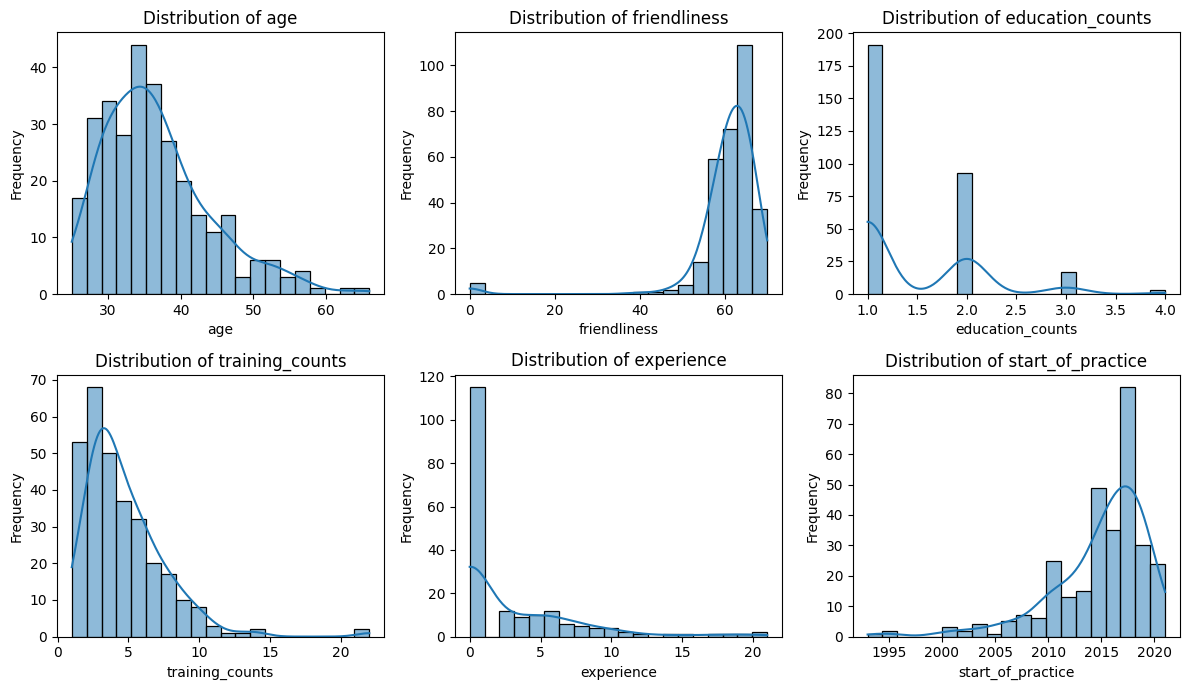

In [30]:
# Выбираем некоторые признаки для оценки распределения. Смотрим гистограмму.
numeric_features = ['age', 'friendliness', 'education_counts', 'training_counts', 'experience', 'start_of_practice']

fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('youtalk_distribution_plots.png')
plt.show()


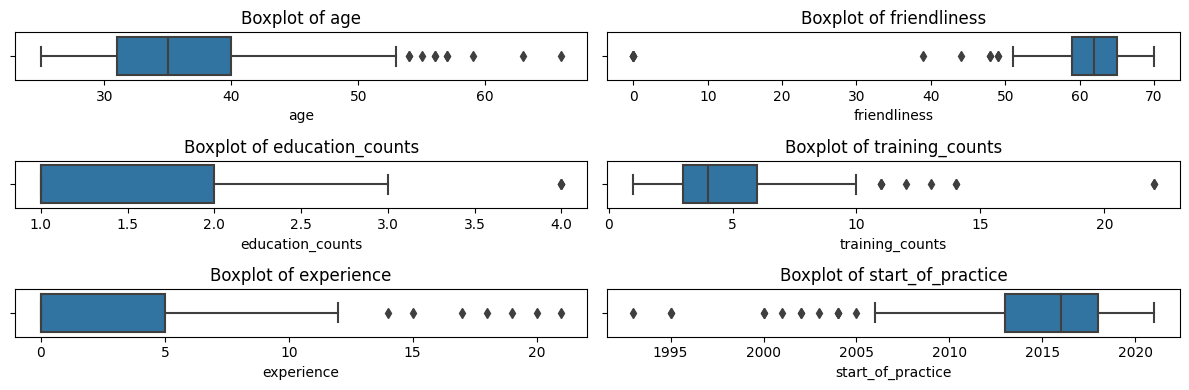

In [58]:
# Можно считать резкие значения за выброс. Строим boxplot.
numeric_features = ['age', 'friendliness', 'education_counts', 'training_counts', 'experience', 'start_of_practice']

fig, axes = plt.subplots(3, 2, figsize=(12, 4))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig('youtalk_boxplots.png')
plt.show()

In [41]:
df['gender'].value_counts()

gender
woman    275
man       28
Name: count, dtype: int64

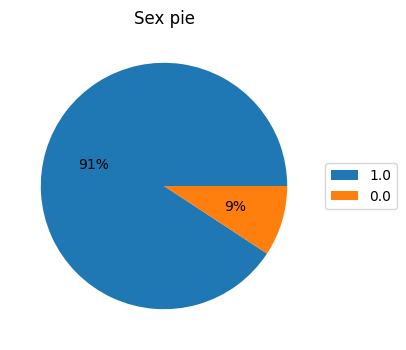

In [59]:
# Получилось что в датасете женщин дольшинство 
city_counts = df['gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(city_counts, autopct='%.0f%%')
plt.title('Sex pie')
plt.legend(city_counts.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.savefig('youtalk_gender.png')
plt.show()

In [56]:
df =  df.replace({False: 0, True: 1, "woman": 1, "man": 0})

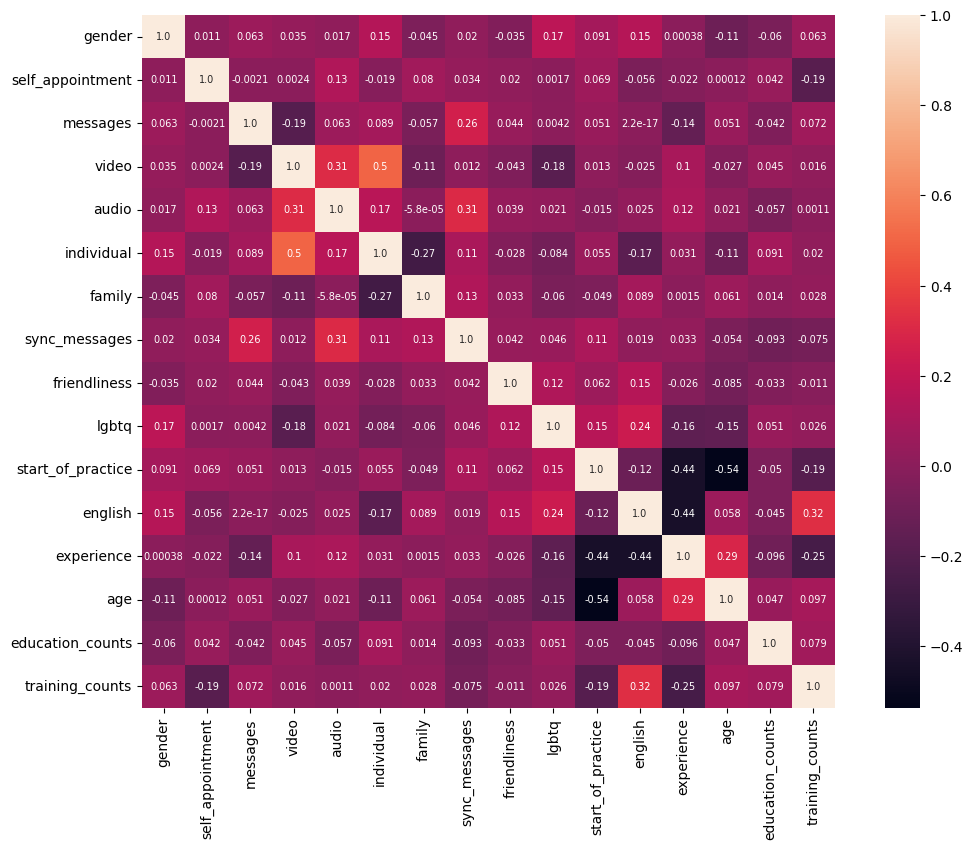

In [57]:
# Создание корреляционной матрицы через heatmap 
correlation_matrix = df.select_dtypes(exclude=object).corr()
fig, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(correlation_matrix,square=True, annot=True, fmt=',.2', annot_kws={"size": 7})
plt.savefig('youtalk_correlation_matrix.png')
plt.show()